<a href="https://colab.research.google.com/github/zhaodrago-cell/ECON5200-zilong-zhao-Applied-Data-Analytics-in-Econ-/blob/main/lab_3/%20lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['SGP', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [38]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_sgp = df.xs('SGP', axis=1, level=0).copy()

Fetching data...


In [39]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_sgp['Natural_Rate_Unemp'] = df_sgp['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_sgp['Productivity'] = df_sgp['GDP_Const'] / df_sgp['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_sgp['NCO'] = df_sgp['Exports_GDP'] - df_sgp['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_sgp['Budget_Balance'] = df_sgp['Tax_Rev_GDP'] - df_sgp['Gov_Exp_GDP']

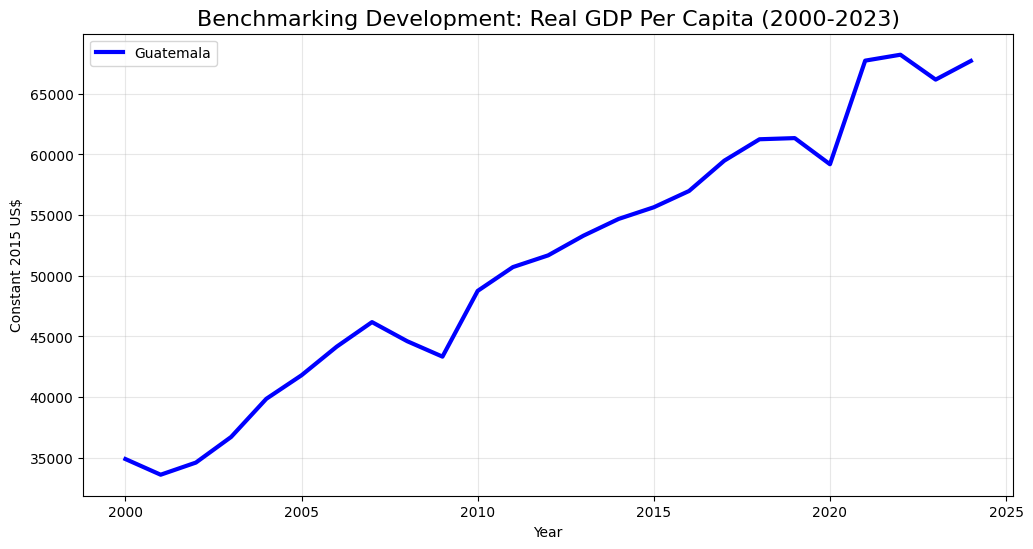

In [40]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('SGP', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

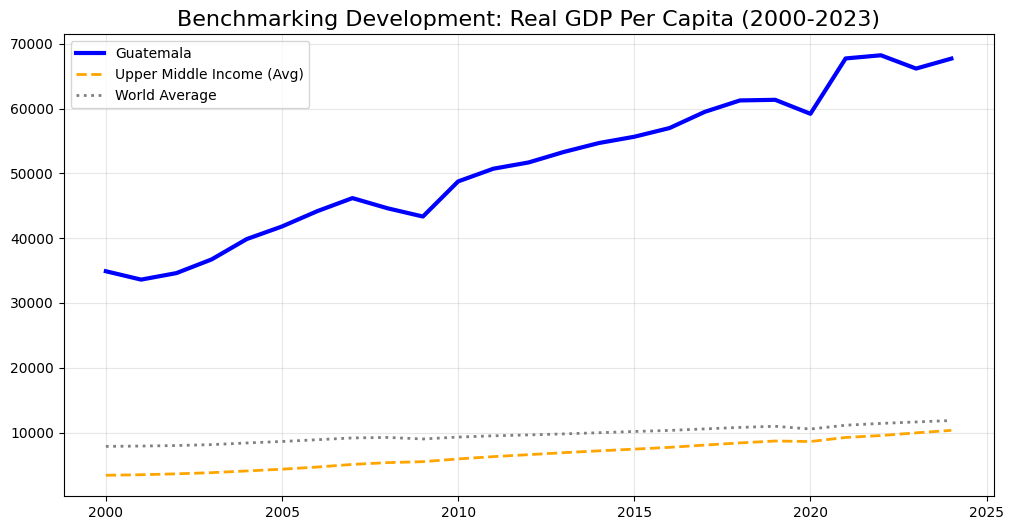

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('SGP', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

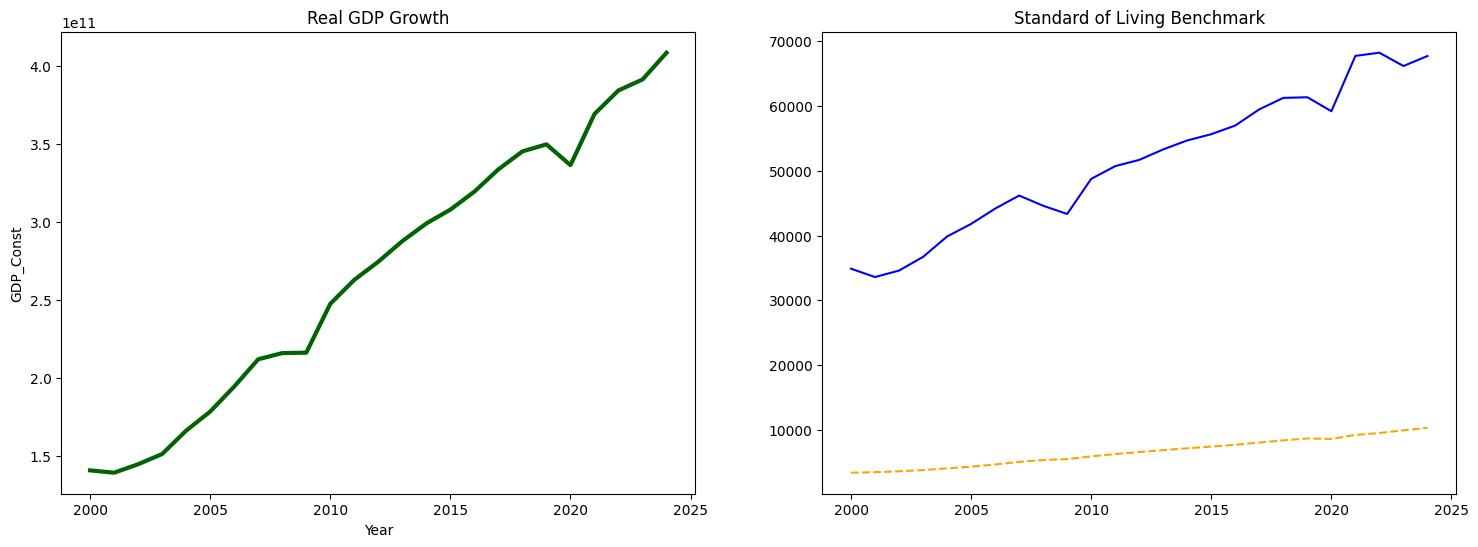

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('SGP', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

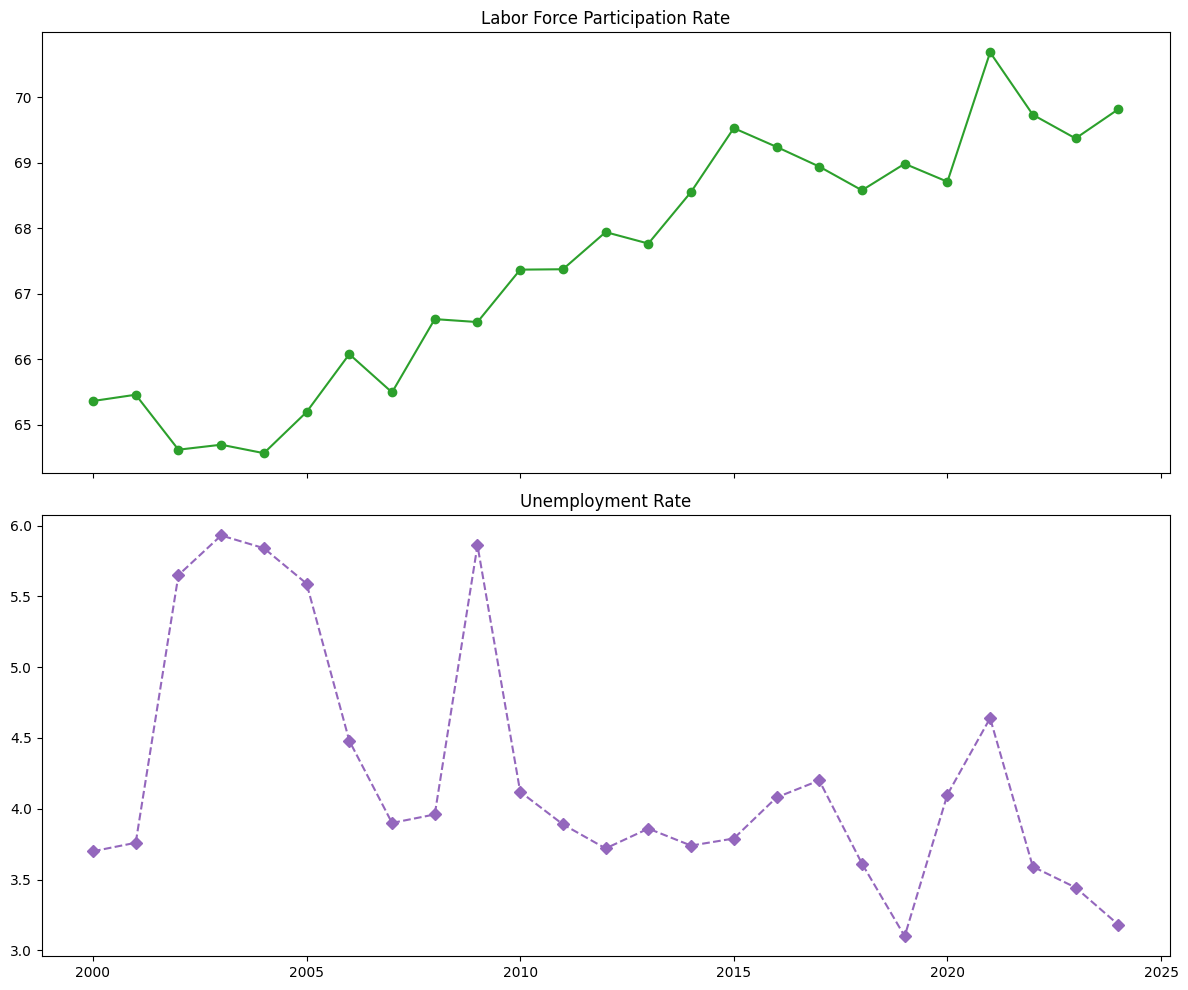

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

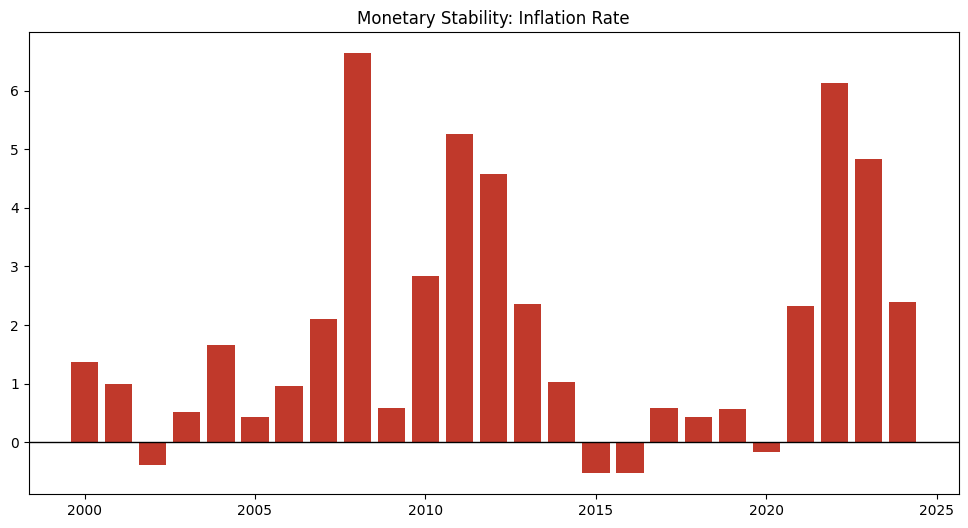

In [44]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

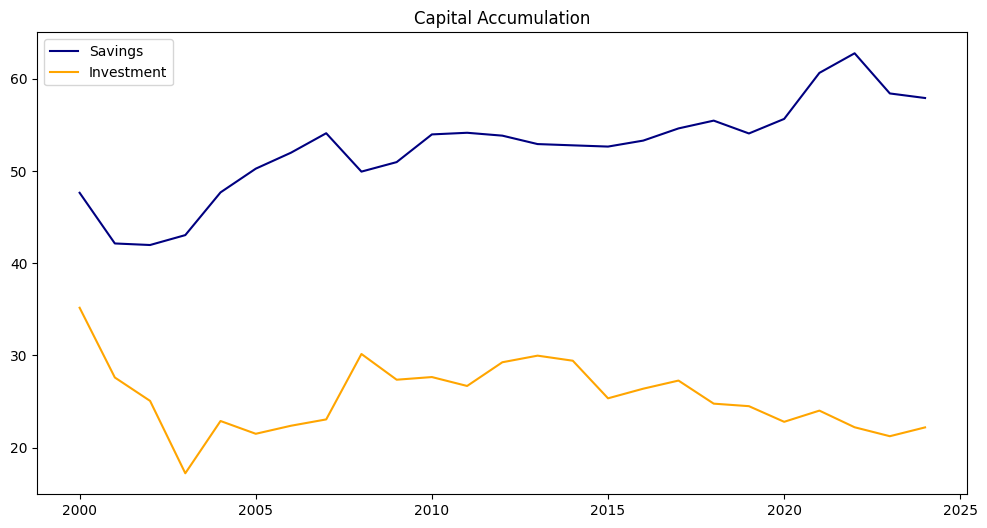

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df_sgp.index, df_sgp['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_sgp.index, df_sgp['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

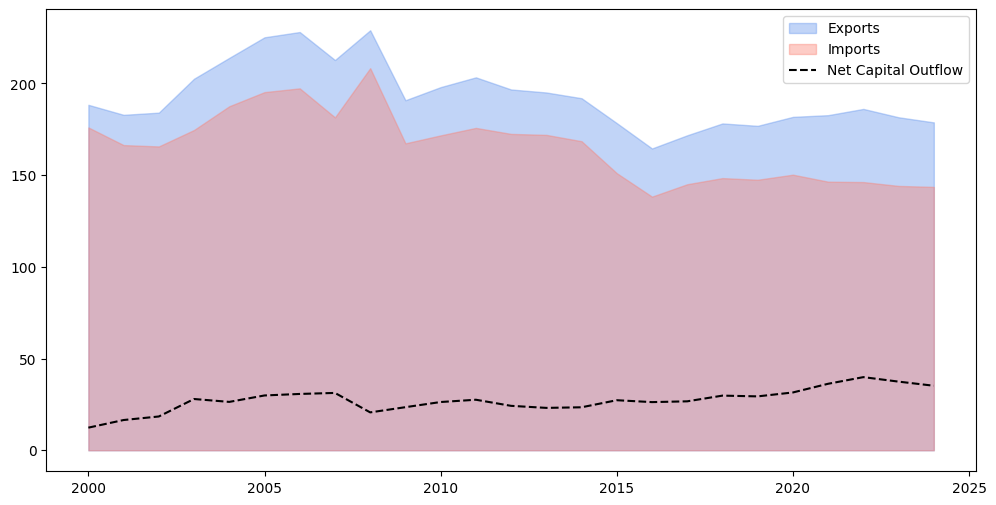

In [46]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_sgp.index, df_sgp['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_sgp.index, df_sgp['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_sgp.index, df_sgp['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

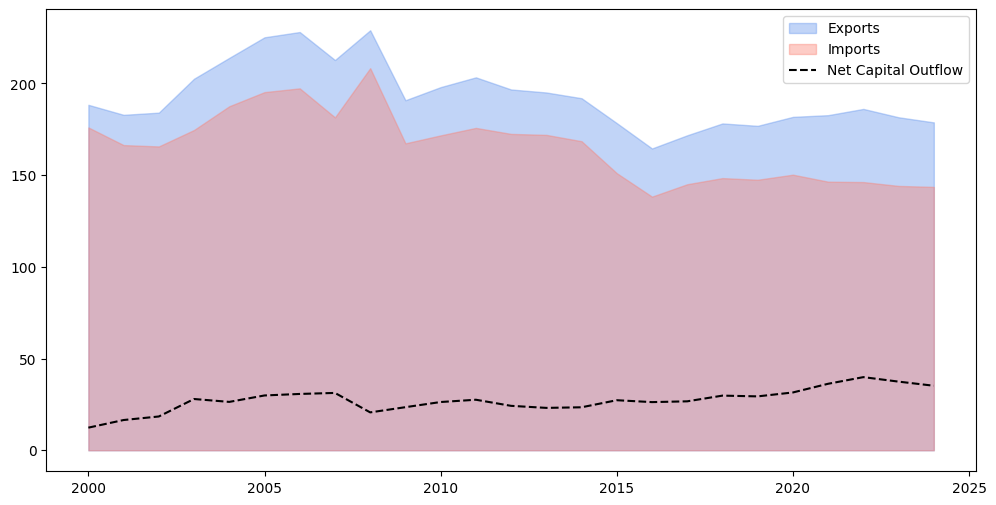

In [51]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_sgp.index, df_sgp['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_sgp.index, df_sgp['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_sgp.index, df_sgp['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()


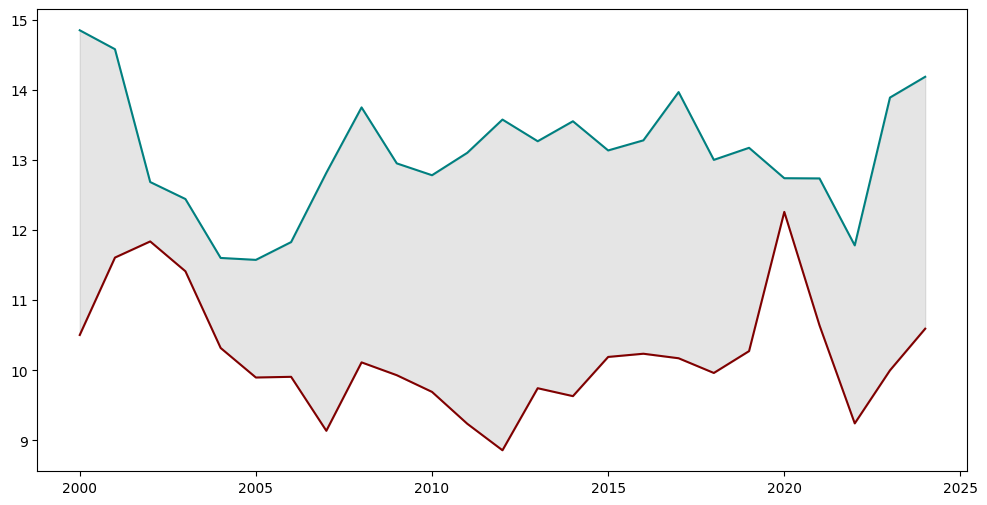

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df_sgp.index, df_sgp['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_sgp.index, df_sgp['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_sgp.index, df_sgp['Tax_Rev_GDP'], df_sgp['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

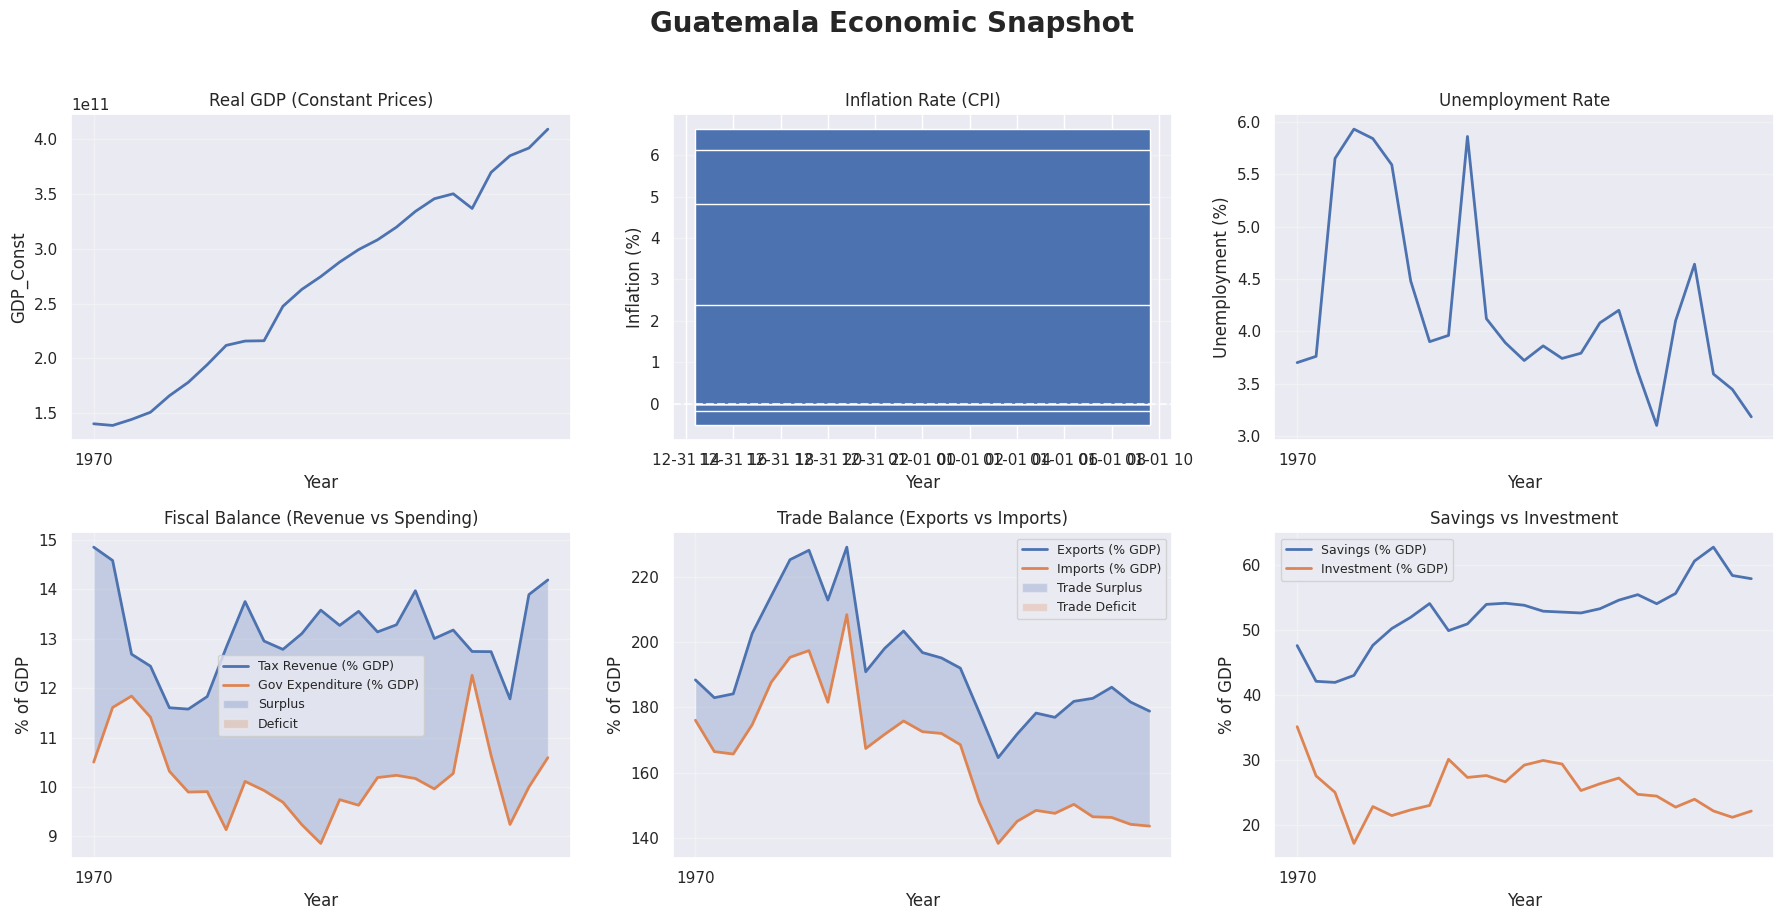

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================
# Guatemala Executive Dashboard
# ============================

# Style settings
plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

# Copy + sort by time (works whether index is a datetime or a column)
df = df_sgp.copy()

# If the index is supposed to be dates but isn't, try converting it
if not isinstance(df.index, pd.DatetimeIndex):
    try:
        df.index = pd.to_datetime(df.index)
    except Exception:
        pass

df = df.sort_index()

# Create 2x3 dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
fig.suptitle("Guatemala Economic Snapshot", fontsize=20, fontweight="bold", y=1.02)

# ----------------------------
# 1) Real GDP (Top Left)
# ----------------------------
ax = axes[0, 0]
ax.plot(df.index, df["GDP_Const"], linewidth=2)
ax.set_title("Real GDP (Constant Prices)")
ax.set_xlabel("Year")
ax.set_ylabel("GDP_Const")
ax.grid(True, alpha=0.3)

# ----------------------------
# 2) Inflation (Top Middle)
# ----------------------------
ax = axes[0, 1]
ax.bar(df.index, df["Inflation_CPI"])
ax.axhline(0, linewidth=1.5, linestyle="--", alpha=0.8)  # zero line
ax.set_title("Inflation Rate (CPI)")
ax.set_xlabel("Year")
ax.set_ylabel("Inflation (%)")
ax.grid(True, axis="y", alpha=0.3)

# ----------------------------
# 3) Unemployment (Top Right)
# ----------------------------
ax = axes[0, 2]
ax.plot(df.index, df["Unemployment_Rate"], linewidth=2)
ax.set_title("Unemployment Rate")
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment (%)")
ax.grid(True, alpha=0.3)

# ----------------------------
# 4) Fiscal Balance (Bottom Left)
# Fill between Tax Revenue and Gov Expenditure
# ----------------------------
ax = axes[1, 0]
tax = df["Tax_Rev_GDP"]
gov = df["Gov_Exp_GDP"]

ax.plot(df.index, tax, linewidth=2, label="Tax Revenue (% GDP)")
ax.plot(df.index, gov, linewidth=2, label="Gov Expenditure (% GDP)")

# Fill: green when Tax > Gov, red when Gov > Tax
ax.fill_between(df.index, tax, gov, where=(tax >= gov), alpha=0.25, interpolate=True, label="Surplus")
ax.fill_between(df.index, tax, gov, where=(tax < gov), alpha=0.25, interpolate=True, label="Deficit")

ax.set_title("Fiscal Balance (Revenue vs Spending)")
ax.set_xlabel("Year")
ax.set_ylabel("% of GDP")
ax.grid(True, alpha=0.3)
ax.legend(loc="best", fontsize=9)

# ----------------------------
# 5) Trade Balance (Bottom Middle)
# Fill between Exports and Imports
# ----------------------------
ax = axes[1, 1]
exp = df["Exports_GDP"]
imp = df["Imports_GDP"]

ax.plot(df.index, exp, linewidth=2, label="Exports (% GDP)")
ax.plot(df.index, imp, linewidth=2, label="Imports (% GDP)")

# Fill: positive (Exports > Imports) vs negative
ax.fill_between(df.index, exp, imp, where=(exp >= imp), alpha=0.25, interpolate=True, label="Trade Surplus")
ax.fill_between(df.index, exp, imp, where=(exp < imp), alpha=0.25, interpolate=True, label="Trade Deficit")

ax.set_title("Trade Balance (Exports vs Imports)")
ax.set_xlabel("Year")
ax.set_ylabel("% of GDP")
ax.grid(True, alpha=0.3)
ax.legend(loc="best", fontsize=9)

# ----------------------------
# 6) Savings vs Investment (Bottom Right)
# Dual lines
# ----------------------------
ax = axes[1, 2]
ax.plot(df.index, df["Gross_Dom_Savings"], linewidth=2, label="Savings (% GDP)")
ax.plot(df.index, df["Gross_Cap_Formation"], linewidth=2, label="Investment (% GDP)")
ax.set_title("Savings vs Investment")
ax.set_xlabel("Year")
ax.set_ylabel("% of GDP")
ax.grid(True, alpha=0.3)
ax.legend(loc="best", fontsize=9)

# Layout cleanup
plt.tight_layout()
plt.show()
